<a href="https://colab.research.google.com/github/HedersonSantos/PredictFligthTicket/blob/main/TransformersAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import io, math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
#https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/data     

In [2]:
!wget https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/Data_Train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/Test_set.csv

--2023-02-27 22:24:55--  https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/Data_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1107157 (1.1M) [text/plain]
Saving to: ‘Data_Train.csv’

Data_Train.csv      100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2023-02-27 22:24:55 (66.1 MB/s) - ‘Data_Train.csv’ saved [1107157/1107157]

--2023-02-27 22:24:55--  https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/Test_set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [3]:
!ls -la


total 1356
drwxr-xr-x 1 root root    4096 Feb 27 22:24 .
drwxr-xr-x 1 root root    4096 Feb 27 22:24 ..
drwxr-xr-x 4 root root    4096 Feb 24 14:37 .config
-rw-r--r-- 1 root root 1107157 Feb 27 22:24 Data_Train.csv
drwxr-xr-x 1 root root    4096 Feb 24 14:38 sample_data
-rw-r--r-- 1 root root  261553 Feb 27 22:24 Test_set.csv


In [4]:
dftrain= pd.read_csv("Data_Train.csv", sep=";", header=0)
dftest = pd.read_csv("Test_set.csv", sep=";", header=0)


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
dftrain.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [7]:
def graficoFrequencia(coluna, df_dados):
  if type(coluna)==list:
    column=coluna
  else:
    column=[coluna]
  df = df_dados[column].value_counts().reset_index().rename(columns={0:'qtd_registros'})
  fig, ax =plt.subplots(figsize=(18, 8), sharex=True)
  for c in column:
    sns.barplot(x=c,y='qtd_registros', data=df,orient='v', ax = ax).set_title(f"distribuição da variável {c}")
  for bar in ax.patches:
    ax.annotate(format(bar.get_height(),'.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
  for item in ax.get_xticklabels():
      item.set_rotation(90)

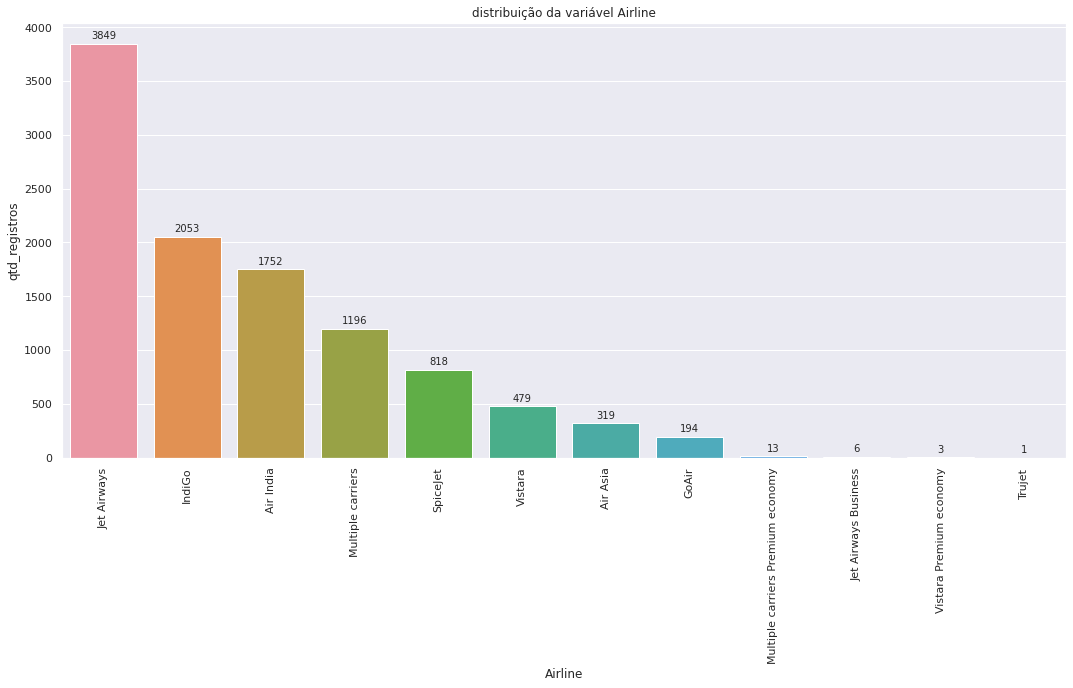

In [8]:
graficoFrequencia('Airline', dftrain)

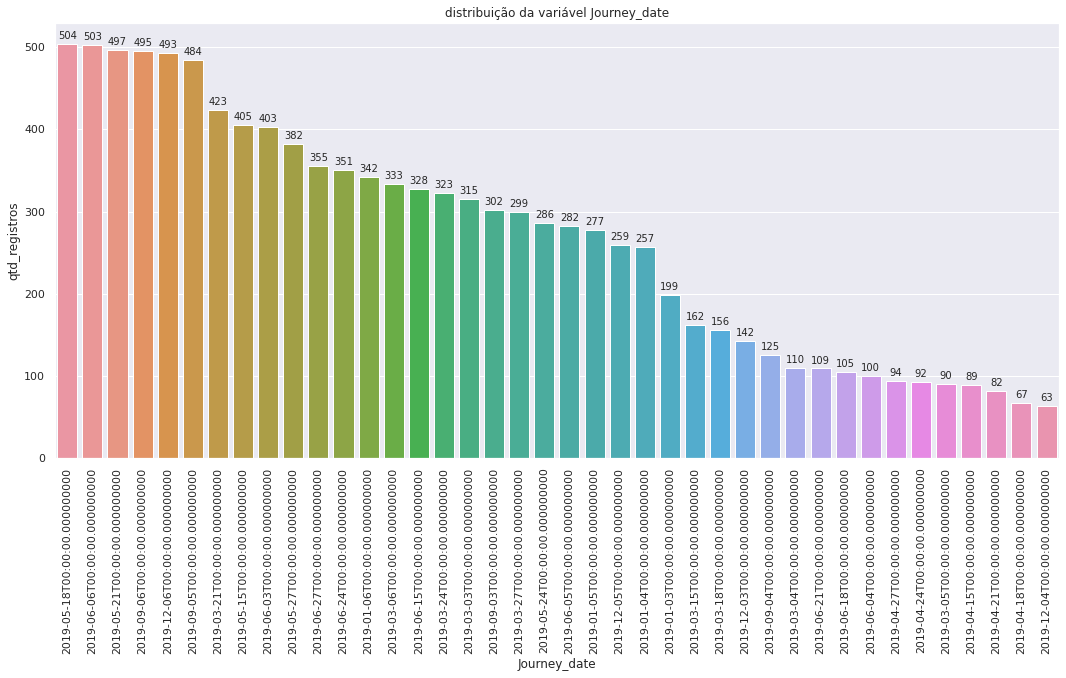

In [9]:
dftrain["Journey_date"] = pd.to_datetime(dftrain["Date_of_Journey"])
graficoFrequencia("Journey_date", dftrain)

In [10]:
dftrain[["Source","Destination"]].value_counts().reset_index().rename(columns={0:'qtd_registros'})

,Source,Destination,qtd_registros
0,Delhi,Cochin,4537
1,Kolkata,Banglore,2871
2,Banglore,Delhi,1265
3,Banglore,New Delhi,932
4,Mumbai,Hyderabad,697
5,Chennai,Kolkata,381


In [11]:
def get_latitude(city_name):
  if city_name=='Banglore':
    return  [13.1989, 77.7068]
  elif city_name=='Chennai':
    return  [12.9941, 80.1709]   
  elif city_name=='Cochin':
    return  [10.1518, 76.3930]
  elif city_name in ['Delhi', 'New Delhi']:
    return [28.5562, 77.1000]
  elif city_name=='Hyderabad':
    return [17.2403, 78.4294] 
  elif city_name == 'Kolkata':
    return [22.5726, 88.3639]
  elif city_name == 'Mumbai':
    return [19.0904, 72.8628]
  else:
    return [0.0, 0.0]


dftrain['source_latitude']=dftrain["Source"].apply(lambda x: get_latitude(x)[0] )
dftrain['source_longitude']=dftrain["Source"].apply(lambda x: get_latitude(x)[1] )
dftrain['destination_latitude']=dftrain["Destination"].apply(lambda x: get_latitude(x)[0] )
dftrain['destination_longitude']=dftrain["Destination"].apply(lambda x: get_latitude(x)[1] )


In [12]:
def rush_time(hour:int):
  if hour >= 0  and hour<=5:
    return 0
  elif hour >=6 and hour<=9:
    return 1 
  elif hour >= 10 and hour<=16:
    return 0
  elif hour >= 17 and hour<=20:
    return 1
  else:
    return 0

dftrain['rush_time']=dftrain['Dep_Time'].apply(lambda x: rush_time(int(x.split(':')[0])))

In [13]:
def get_duration_in_hours(duration):
  hour_minute = duration.split(' ')
  if len(hour_minute)==2:
    hour=int(hour_minute[0].replace('h',''))
    minute=int(hour_minute[1].replace('m',''))
  else:
    if 'h' in hour_minute[0]:
      hour=int(hour_minute[0].replace('h',''))
      minute=0
    else:
      minute=int(hour_minute[0].replace('m',''))
      hour=0
  return hour+minute/60


dftrain['Duration_in_hours']=dftrain['Duration'].apply(lambda x: get_duration_in_hours(x))

In [14]:
def get_total_stops(total_stops_text):
  if (total_stops_text==None) or (total_stops_text=='non-stop') or (total_stops_text=='None'):
     return 0
  else:
    return int(total_stops_text.split(" ")[0])

dftrain = dftrain.astype(object).replace(np.nan, 'None')
dftrain['Qt_Total_Stops'] = dftrain['Total_Stops'].apply(lambda x: get_total_stops(x))


In [15]:
def graficocomPreco(coluna, df_dados):
  if type(coluna)==list:
    column=coluna
  else:
    column=[coluna]
  if 'Price' not in (column):
    column_price = column.copy()
    column_price.append('Price')
  df = df_dados[column_price].groupby(column)['Price'].median().reset_index()
  fig, ax =plt.subplots(figsize=(18, 8), sharex=True)
  for c in column:
    if c!="Price":
      if len(column)==1:
        sns.barplot(x=c,y='Price', data=df,orient='v', ax = ax).set_title(f"distribuição da variável {c}")
      else:
        sns.lineplot(x=c,y='Price', data=df, ax = ax).set_title(f"distribuição da variável {c}")
  for bar in ax.patches:
    ax.annotate(format(bar.get_height(),'.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
  for item in ax.get_xticklabels():
      item.set_rotation(90)


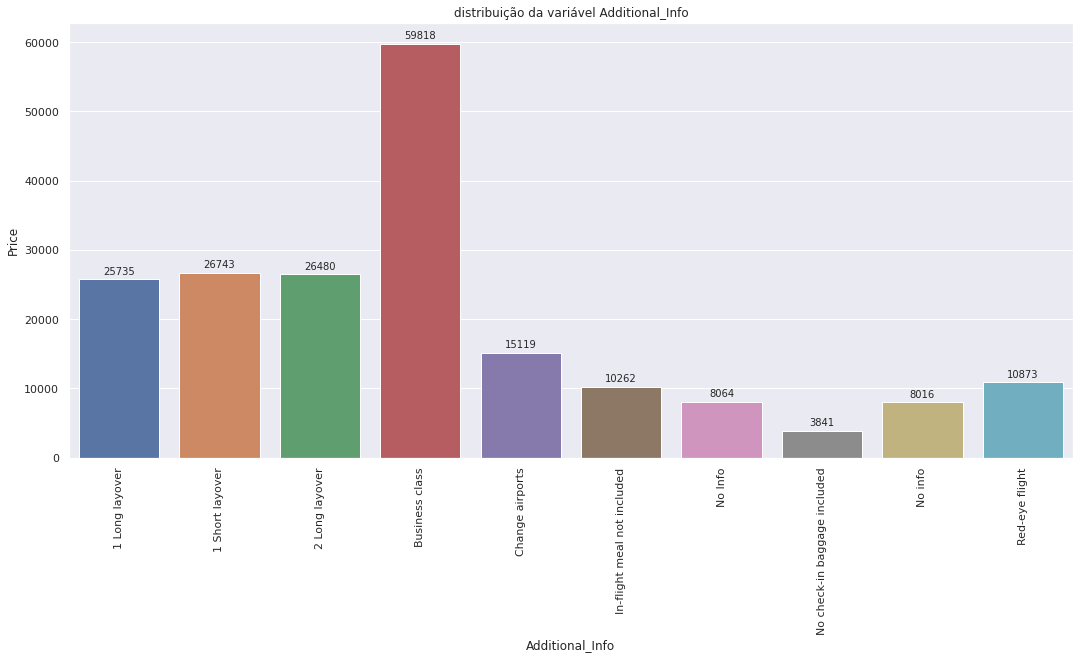

In [16]:
graficocomPreco('Additional_Info',dftrain)

In [17]:
additional_info = dftrain['Additional_Info'].unique().tolist()
additional_info = [info for info in additional_info if info not in ['No info','No Info']]
additional_info
for info in additional_info:
  dftrain[info] =  dftrain['Additional_Info'].apply(lambda x: 1 if x==info else 0)


In [18]:
dftrain.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'source_latitude',
       'source_longitude', 'destination_latitude', 'destination_longitude',
       'rush_time', 'Duration_in_hours', 'Qt_Total_Stops',
       'In-flight meal not included', 'No check-in baggage included',
       '1 Short layover', '1 Long layover', 'Change airports',
       'Business class', 'Red-eye flight', '2 Long layover'],
      dtype='object')

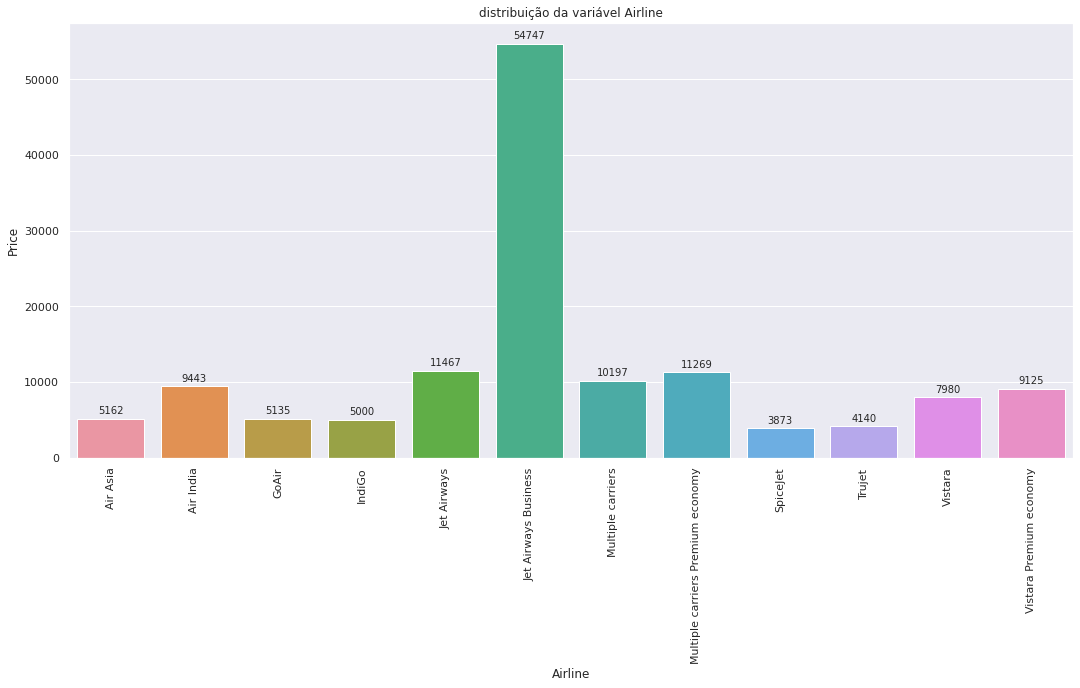

In [19]:
graficocomPreco('Airline',dftrain)

In [20]:
dftrain[['Source', 'Destination','Price']].groupby(['Source', 'Destination'])['Price'].median().reset_index()

,Source,Destination,Price
0,Banglore,Delhi,4823.0
1,Banglore,New Delhi,10898.5
2,Chennai,Kolkata,3850.0
3,Delhi,Cochin,10262.0
4,Kolkata,Banglore,9345.0
5,Mumbai,Hyderabad,3342.0


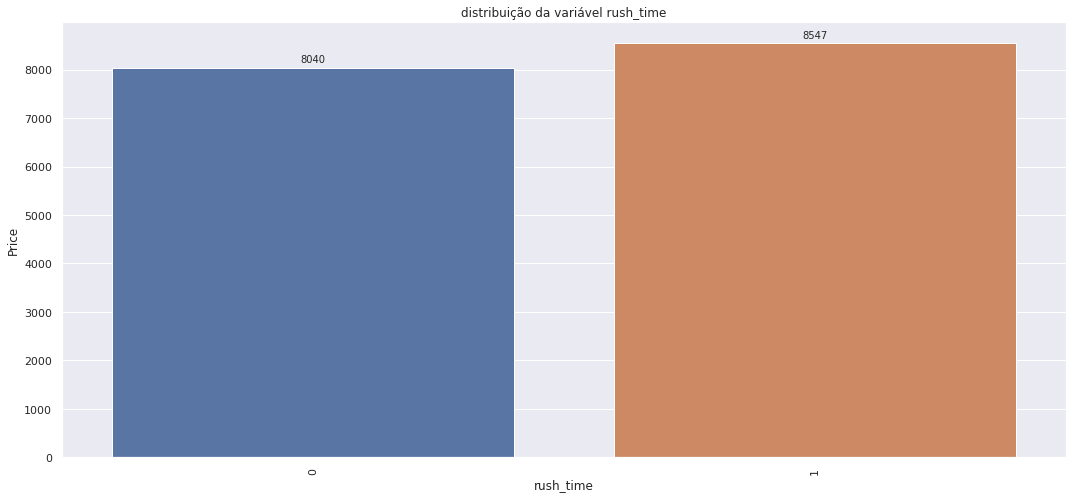

In [27]:
graficocomPreco('rush_time',dftrain)


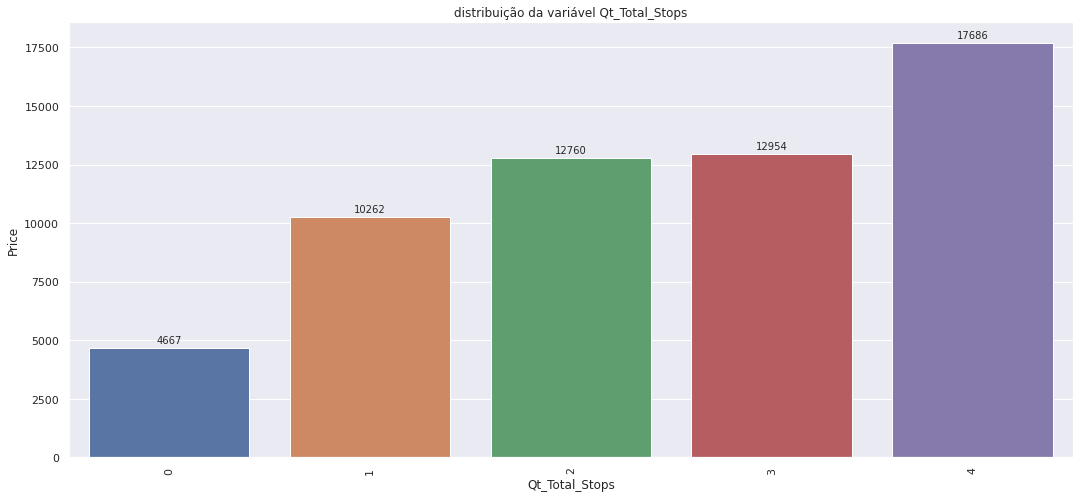

In [22]:
graficocomPreco('Qt_Total_Stops',dftrain)

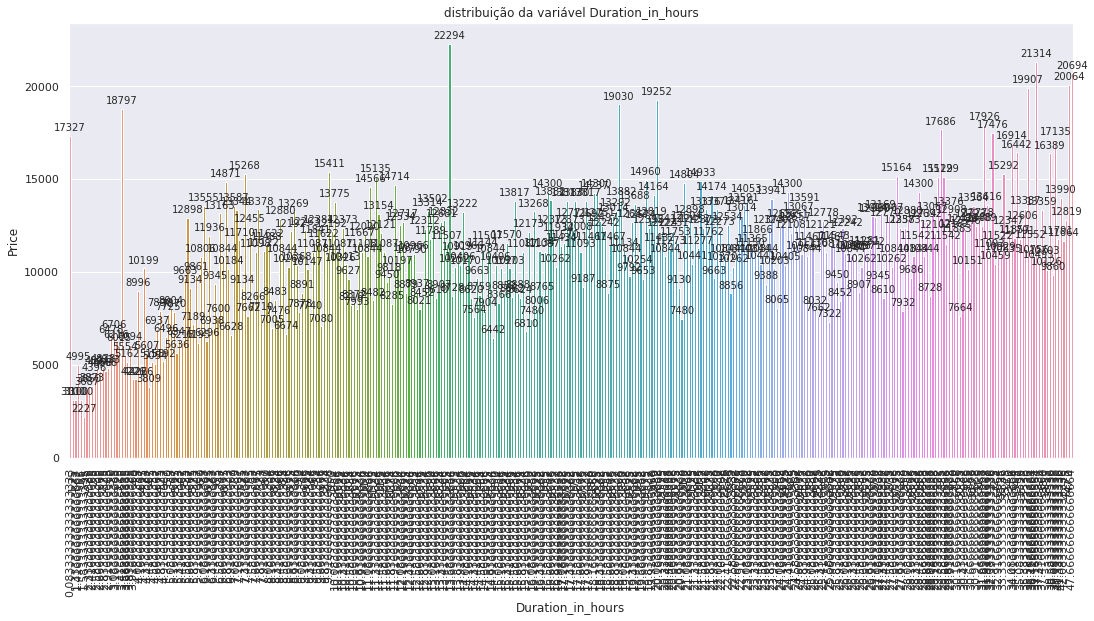

In [37]:
graficocomPreco('Duration_in_hours',dftrain)

In [36]:
colunas=['source_latitude', 'source_longitude', 'destination_latitude','destination_longitude', 'rush_time', 'Duration_in_hours','Qt_Total_Stops', 'In-flight meal not included', 'No check-in baggage included',
       '1 Short layover', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover', 'Price']
dtrain_tratado = dftrain[colunas].copy()

In [40]:
dftrain[dftrain['Price']==22294]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,source_latitude,source_longitude,destination_latitude,destination_longitude,rush_time,Duration_in_hours,Qt_Total_Stops,In-flight meal not included,No check-in baggage included,1 Short layover,1 Long layover,Change airports,Business class,Red-eye flight,2 Long layover
10351,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,03:00,16:35,13h 35m,1 stop,No info,22294,2019-12-03,19.0904,72.8628,17.2403,78.4294,0,13.583333,1,0,0,0,0,0,0,0,0
